In [39]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sn

Populating the interactive namespace from numpy and matplotlib


# Loading Data from csv File

In [2]:
df = pd.read_csv("uber-raw-data-apr14.csv")

In [3]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
df.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [5]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [6]:
date = "4/1/2014 0:11:00"

In [7]:
date = pd.to_datetime(date)

In [8]:
print(date)

2014-04-01 00:11:00


In [9]:
date.weekday()

1

In [10]:
date.weekday_name

c:\users\syedhamad\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """Entry point for launching an IPython kernel.


'Tuesday'

In [11]:
date.week

14

In [12]:
df["Date/Time"] = df["Date/Time"].map(pd.to_datetime)

In [13]:
def get_dom(date):
    return date.day
df["Dom"] = df["Date/Time"].map(get_dom)

In [14]:
df.head()

,Date/Time,Lat,Lon,Base,Dom
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [15]:
df.tail()

,Date/Time,Lat,Lon,Base,Dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [16]:
def get_weekday(date):
    return date.weekday()
df["Weekday"] = df["Date/Time"].map(get_weekday)

In [17]:
def get_hour(date):
    return date.hour
df["Hour"] = df["Date/Time"].map(get_hour)

In [18]:
df.head()

,Date/Time,Lat,Lon,Base,Dom,Weekday,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


In [19]:
df.tail()

,Date/Time,Lat,Lon,Base,Dom,Weekday,Hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# Analysis Of Data

Text(0.5, 1.0, 'Uber Data from Date of month')

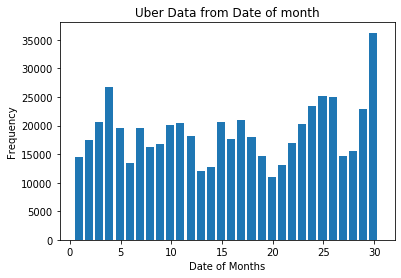

In [43]:
hist(df.Dom, bins = 30,width = .8, range = (0.5, 30.5))
plt.xlabel("Date of Months")
plt.ylabel("Frequency")
plt.title("Uber Data from Date of month")

Text(0.5, 1.0, 'Uber Data from Date of month')

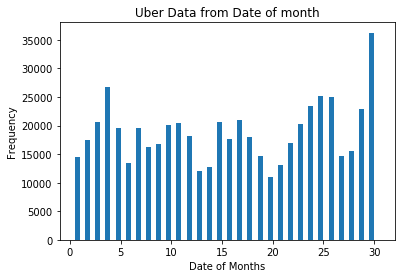

In [42]:
plt.hist(df.Dom, bins = 30, width = .5, range= (0.5, 30.5))
plt.xlabel("Date of Months")
plt.ylabel("Frequency")
plt.title("Uber Data from Date of month")

In [49]:
def count(rows):
    return len(rows)
group_data = df.groupby('Dom').apply(count)
group_data


Dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

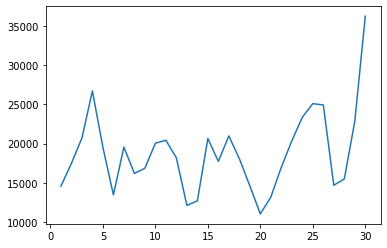

In [52]:
plot(group_data)

(array([ 60861.,  91185.,      0., 108631.,      0.,  85067.,  90303.,
             0.,  77218.,  51251.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

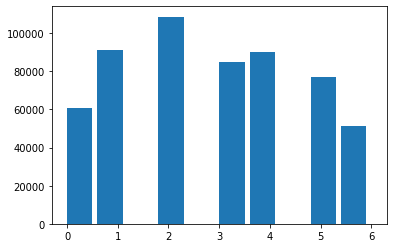

In [57]:
plt.hist(df.Weekday, width = .5)

Text(0.5, 1.0, 'Uber Data')

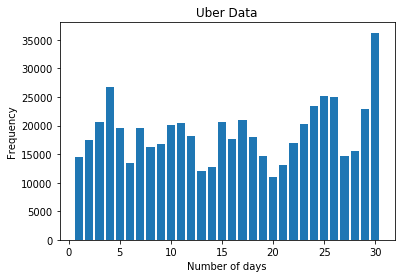

In [65]:
bar(range(1,31), group_data)
plt.xlabel("Number of days")
plt.ylabel("Frequency")
plt.title("Uber Data")

In [67]:
group_data_sorted = group_data.sort_values()
group_data_sorted

Dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

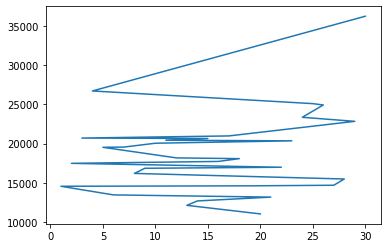

In [68]:
plot(group_data_sorted)

(array([5., 4., 7., 8., 2., 2., 1., 0., 0., 1.]),
 array([11017. , 13540.4, 16063.8, 18587.2, 21110.6, 23634. , 26157.4,
        28680.8, 31204.2, 33727.6, 36251. ]),
 <a list of 10 Patch objects>)

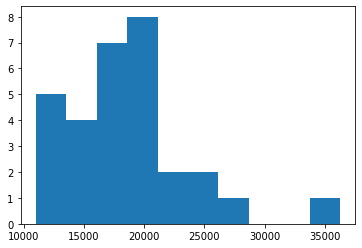

In [79]:
plt.hist(group_data_sorted)

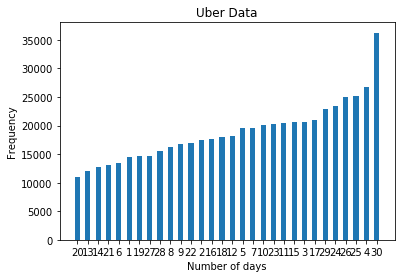

In [95]:
bar(range(1,31), group_data_sorted, width=.5)
xticks(range(1,31), group_data_sorted.index)
plt.xlabel("Number of days")
plt.ylabel("Frequency")
plt.title("Uber Data");

# analysis of Hours

In [99]:
df.head()

,Date/Time,Lat,Lon,Base,Dom,Weekday,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


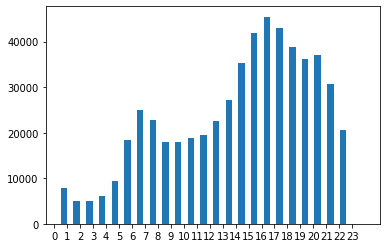

In [106]:
hist(df.Hour,bins = 24, width= .5, range= (.5,24))
xticks(range(0,24) );

# Analysis Of Weekday

''

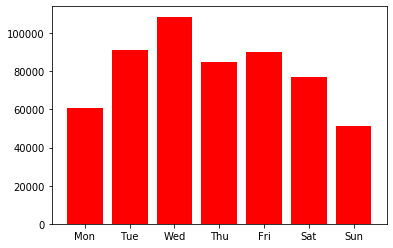

In [121]:
hist(df.Weekday, bins= 7, range=(-.5,6.5), rwidth= .8, color = 'red')
xticks(range(7), "Mon Tue Wed Thu Fri Sat Sun".split())
;

# Cross Analysis of (hour, Dom)

In [124]:
count(df)

564516

In [133]:
cross_analysis1 = df.groupby("Hour Weekday".split()).apply(count)
cross_analysis1

Hour  Weekday
0     0           518
      1           765
      2           899
      3           792
      4          1367
                 ... 
23    2          2571
      3          2909
      4          5393
      5          5719
      6          1018
Length: 168, dtype: int64

In [131]:
cross_analysis.head()

Hour  Weekday
0     0           518
      1           765
      2           899
      3           792
      4          1367
dtype: int64

In [132]:
cross_analysis.tail()

Hour  Weekday
23    2          2571
      3          2909
      4          5393
      5          5719
      6          1018
dtype: int64

In [138]:
cross_analysis2 = df.groupby(" Hour Weekday".split()).apply(count).unstack()
cross_analysis2

Weekday,0,1,2,3,4,5,6
Hour,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


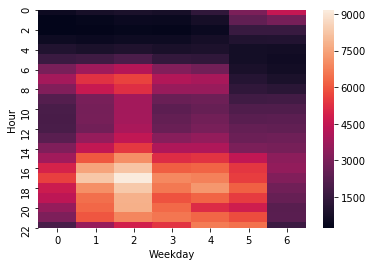

In [139]:
sn.heatmap(cross_analysis2)

# By lat and Lon 

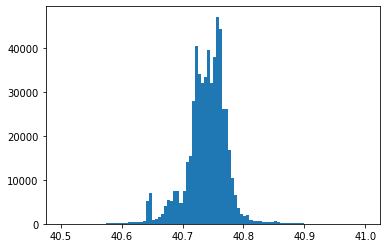

In [164]:
hist(df['Lat'],  bins = 100, range=(40.5, 41));

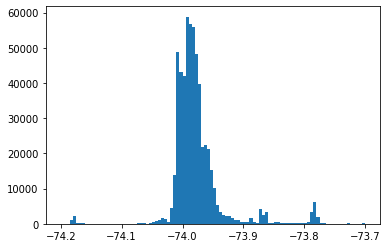

In [162]:
hist(df['Lon'], bins = 100,range=(-74.2, -73.7) );

''

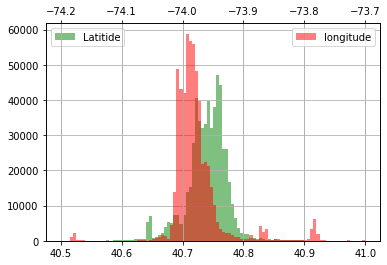

In [172]:
hist(df['Lat'],  bins = 100, range=(40.5, 41), color = 'green', alpha= .5, label= "Latitide")
grid()
legend(loc= "upper left")
twiny()
hist(df['Lon'], bins = 100,range=(-74.2, -73.7), color="red",alpha= .5 , label = "longitude")
grid()
legend(loc= "best")
;

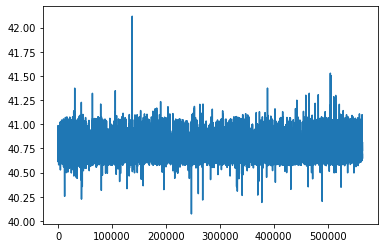

In [174]:
plot(df['Lat'])

(0, 100)

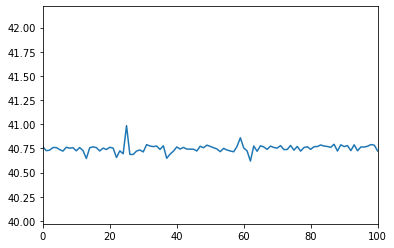

In [175]:
plot(df['Lat'])
xlim(0,100)

(0, 100)

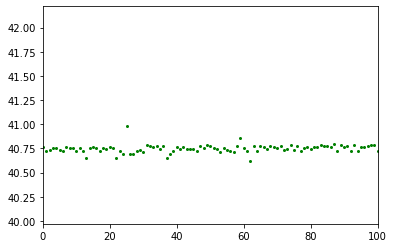

In [179]:
plot(df['Lat'], '.', ms='4', color = "green")
xlim(0,100)